In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gs
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, f1_score, confusion_matrix

In [2]:
df = pd.read_csv('data/creditcard.csv')
print(df.head(10))

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
5   2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728  0.476201   
6   4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708 -0.005159   
7   7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118  1.120631   
8   7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818  0.370145   
9   9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761  0.651583   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -

In [3]:
print(f'Cantidad de ejemplos en el dataset: {len(df)}')
print(f'Cantidad de caracteristicas: {len(df.columns)-1}')

Cantidad de ejemplos en el dataset: 284807
Cantidad de caracteristicas: 30


In [4]:
print(f'Cantidad de ejemplos con fraude: {len(df[df['Class'] == 1])}')
print(f'Cantidad de ejemplos legitimos: {len(df[df['Class'] == 0])}')

Cantidad de ejemplos con fraude: 492
Cantidad de ejemplos legitimos: 284315


In [5]:
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
X.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
dtype: bool

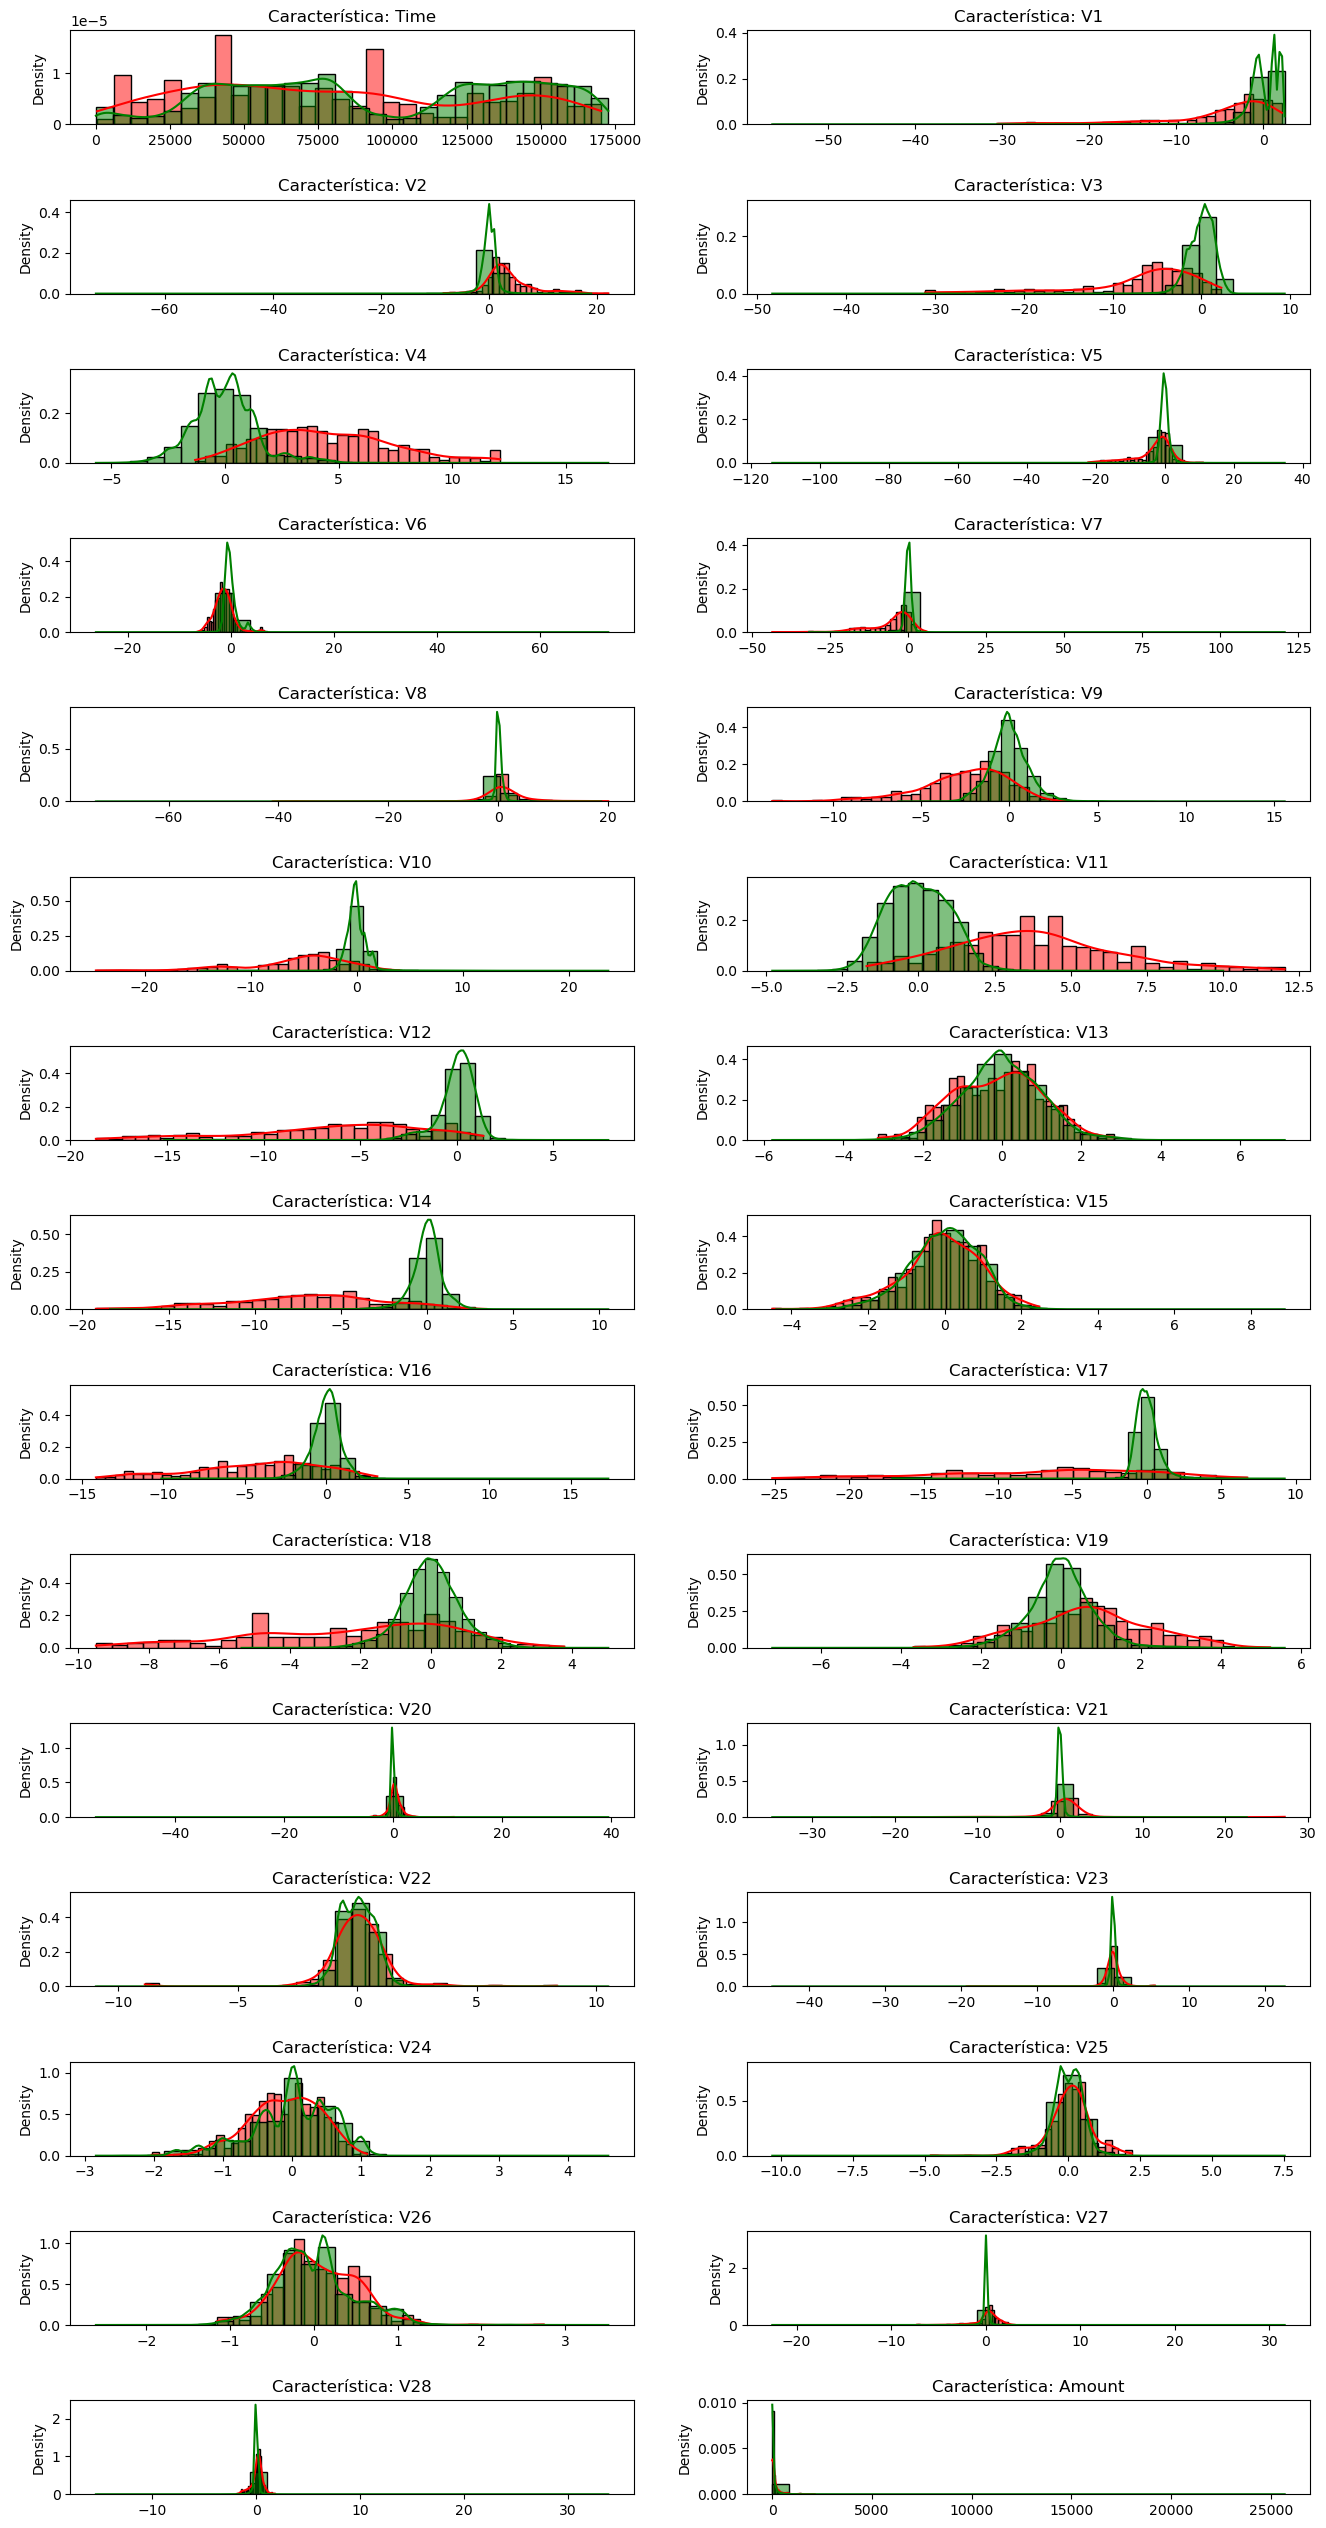

In [7]:
plt.figure(figsize=(16, 32))
grid = gs.GridSpec(15, 2, wspace=0.2, hspace=0.2)
grid.update(hspace=0.8)

for i, feature in enumerate(X):
    ax = plt.subplot(grid[i])
    sns.histplot(data=df[df['Class'] == 1], x=feature, kde=True, color='red', stat='density', label='Fraudulenta (1)', alpha=0.5, bins=30)
    sns.histplot(data=df[df['Class'] == 0], x=feature, kde=True, color='green', stat='density', label='Legitima (0)', alpha=0.5, bins=30)
    ax.set_xlabel('')
    ax.set_title(f'Característica: {feature}')

In [8]:
X.drop('Amount', axis=1, inplace=True)

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
seed = 86
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=seed, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train)

In [11]:
sm = SMOTE(random_state=seed)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print(y_train_res.value_counts())

Class
0    181961
1    181961
Name: count, dtype: int64


In [12]:
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_res.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu')) 
model.add(Dense(1, activation='sigmoid'));

optimizer = 'adam'
loss = 'binary_crossentropy'
metrics =['accuracy']
patience = 5

model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True)

batch_size = 512
epochs = 100

history = model.fit(X_train_res, y_train_res, epochs=100, batch_size=batch_size, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/100


/opt/anaconda3/envs/computervision_face_recognition/lib/python3.12/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.9110 - loss: 0.2206 - val_accuracy: 0.9899 - val_loss: 0.0312
Epoch 2/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - accuracy: 0.9915 - loss: 0.0309 - val_accuracy: 0.9954 - val_loss: 0.0191
Epoch 3/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.9963 - loss: 0.0157 - val_accuracy: 0.9975 - val_loss: 0.0151
Epoch 4/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 712us/step - accuracy: 0.9976 - loss: 0.0102 - val_accuracy: 0.9984 - val_loss: 0.0154
Epoch 5/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 737us/step - accuracy: 0.9983 - loss: 0.0072 - val_accuracy: 0.9990 - val_loss: 0.0166
Epoch 6/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 754us/step - accuracy: 0.9987 - loss: 0.0058 - val_accuracy: 0.9990 - val_loss: 0.0185
Epoch 7/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 722us/step - accuracy: 0.9989 - loss: 0.0048 - val_accuracy: 0.9991 - val_loss: 0.0206
Epoch 8/100
711/711 ━━━━━━━━━━━━━━━━━━━━ 1s 730us/step - accuracy: 0.9990 - loss: 0.0045 - val_

In [14]:
predictions = model.predict(X_test)

best_threshold = 0
best_f1 = 0
for threshold in np.arange(0.1, 0.9, 0.01):
    preds = (predictions > threshold).astype(int)
    f1 = f1_score(y_test, preds)
    if f1 > best_f1:
        best_f1 = f1
        best_threshold = threshold
print(f'Mejor limíte de decisión: {best_threshold}, Mejor F1 Score: {best_f1}')        

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 0s 182us/step
Mejor limíte de decisión: 0.8899999999999996, Mejor F1 Score: 0.6942148760330579


In [15]:
best_preds = (predictions > best_threshold).astype(int)
print(f'Reporte de clasificación:(threshold={best_threshold})')
print(classification_report(y_test, best_preds))

Reporte de clasificación:(threshold=0.8899999999999996)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.58      0.86      0.69        98

    accuracy                           1.00     56962
   macro avg       0.79      0.93      0.85     56962
weighted avg       1.00      1.00      1.00     56962



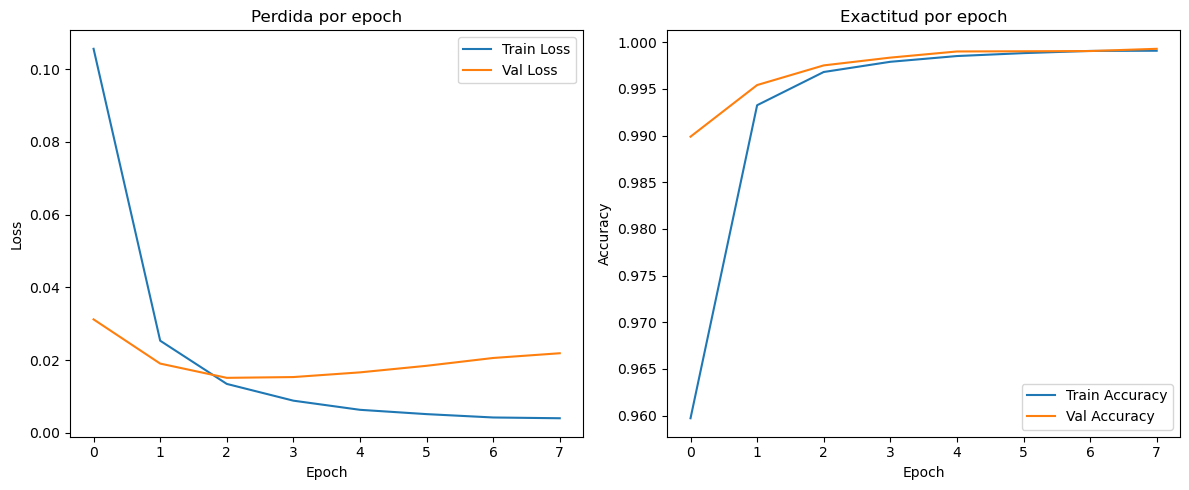

In [16]:
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Perdida por epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Exactitud por epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

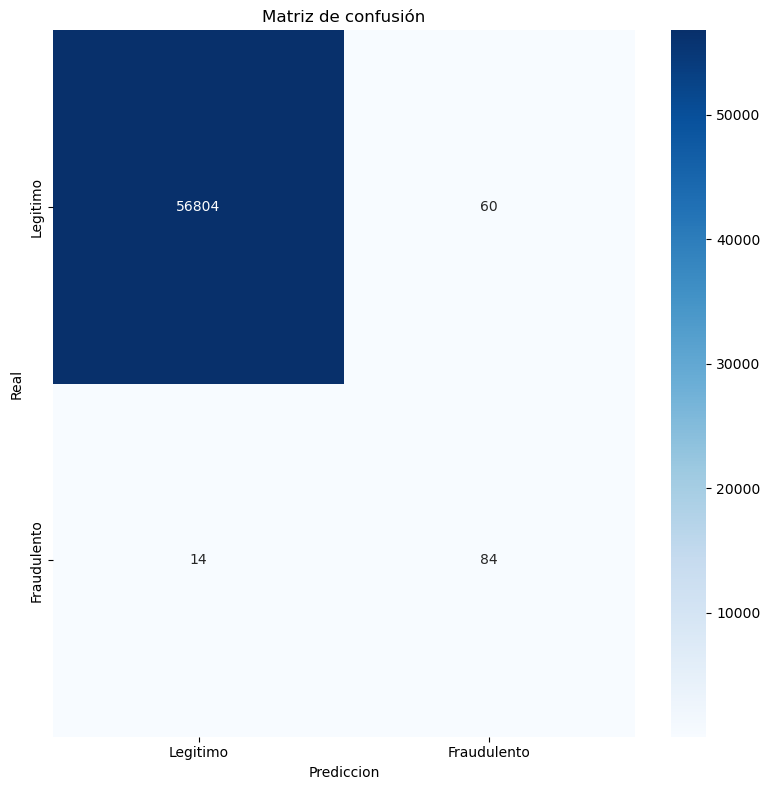

In [17]:
plt.figure(figsize=(8, 8))
cm = confusion_matrix(y_test, best_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimo', 'Fraudulento'], yticklabels=['Legitimo', 'Fraudulento'])
plt.xlabel('Prediccion')
plt.ylabel('Real')
plt.title('Matriz de confusión')
plt.tight_layout()
plt.show()